# Εντοπισμός περιοδικότητας με "Γρήγορο Μετασχηματισμό Fourier (FFT)"

In [1]:
from scipy.fft import rfft, irfft, rfftfreq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Εισαγωγή δεδομένων και προεπεξεργασία.

In [2]:
df = pd.read_csv('kunak_filled.csv', parse_dates=['Datetime'], index_col='Datetime')
df = df.resample('H').mean()
h2s = df['H2S (ppb)'][2:]
h2s.head()

Datetime
2022-04-10 02:00:00    13.33
2022-04-10 03:00:00     1.31
2022-04-10 04:00:00     0.33
2022-04-10 05:00:00     2.11
2022-04-10 06:00:00     0.84
Freq: H, Name: H2S (ppb), dtype: float64

#### Κανονικοποίηση αφαιρώντας την μέση τιμή από τα δεδομένα της χρονοσειράς και διάγραμμα αυτής.

In [3]:
h2s = h2s - h2s.mean()

#### Μετασχηματισμός FFT

In [4]:
h2s_fft = rfft(h2s.values)
h2s_amp = np.abs(h2s_fft)
h2s_freq = rfftfreq(len(h2s))

#### Εντοπισμός κύριας συχνότητας και φιλτράρισμα των συντελεστών Fourier.

In [5]:
id_of_maxamp = h2s_amp.argmax()
fft_clean = np.zeros_like(h2s_fft)
fft_clean[id_of_maxamp]= h2s_fft[id_of_maxamp]

#### Αντίστροφος μετασχηματισμός Fourier και γράφημα καθαρού σήματος στο χρονικό πεδίο.

In [6]:
clean_h2s = irfft(fft_clean)

***Εμφανής 24ωρη περιοδικότητα.***

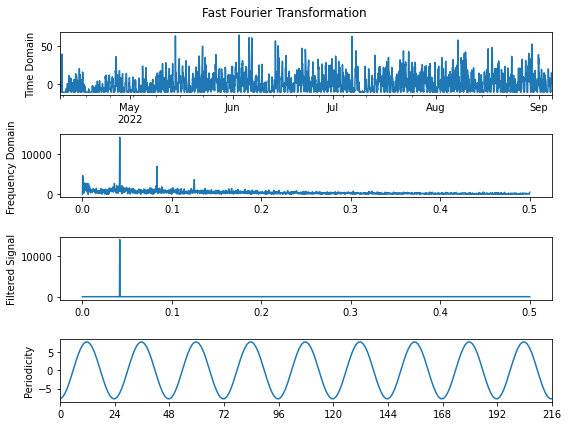

In [7]:
fig, ax = plt.subplots(4, figsize=(8,6))

h2s.plot(ax=ax[0])
ax[0].set_ylabel("Time Domain")
ax[0].set_xlabel("")

ax[1].plot(h2s_freq, h2s_amp)
ax[1].set_ylabel("Frequency Domain")


ax[2].plot(h2s_freq,np.abs(fft_clean))
ax[2].set_ylabel("Filtered Signal")


ax[3].plot(clean_h2s[9:])
ax[3].set_ylabel("Periodicity")
ax[3].set_xlim((0,100))
ax[3].set_xticks(np.arange(0,220,24))
#ax[3].grid()

plt.suptitle("Fast Fourier Transformation")
plt.tight_layout()
plt.savefig('Plots/fft/FFT.png')
plt.show()